# Diferencias finitas regresivas en tiempo y centradas en espacio BTCS.
La primera derivada

$$\frac{\partial u}{\partial t} (x_i, t_j) = \frac{u(x_i, t_j) - u(x_i, t_j - \Delta t)}{\Delta t} + \mathcal{O}(\Delta t) $$

En la parte espacial es un segunda derivada centrada en espacio. En terminos de la notaci'on $w_{ij}$

$$\frac{w_{ij} - w_{i \; j-1}}{\Delta t} = \alpha \frac{w_{i+1 \; j} - 2 w_{ij} + w_{i-1 \; j}}{(\Delta x)^2}  + \mathcal{O}(\Delta t) + \mathcal{O}((\Delta x)^2). $$
Como siempre vamos a ignorar el error.
La ecuaci'on queda ($j$ en terminos de $j-1$)
con $\gamma = \frac{\alpha \Delta t}{(\Delta x)^2}$.

$$(1 + 2 \gamma) w_{ij} -\gamma( w_{i+1 \; j} + w_{i-1 \; j}) = w_{i \; j-1}    \quad  , \quad j=1, \cdots ,nt-1 \quad, \quad i=1, \cdots, nx-1$$



Vamos a escribir esta ecuacion ordenando $i-1, i , i+1$.

$$-\gamma w_{i-1 \; j} + (1 + 2 \gamma) w_{ij} - \gamma w_{i+1 \; j} = w_{i \; j-1}$$

Con esto construimos el sistema de forma matricial.

$j=1$
$$-\gamma w_{i-1 \; 1} + (1 + 2 \gamma) w_{i1} - \gamma w_{i+1 \; 1} = w_{i \; 0} \quad , \quad i=1, \cdots, n-1$$

$$w_{i0} = u(x_i, t_0) = I_0(x_i) \quad , \quad w_{01} = h_1(t_1) \quad , \quad w_{n1} = h_2(t_1) $$
Vamos a considerar casos

* $i=1$ y $j=j$
$$-\gamma w_{0  j} + (1 + 2 \gamma) w_{1j} - \gamma w_{2  j} = w_{1  j-1} \quad , \quad i=1, \cdots, n-1$$

Pasamos el t'ermino $w_{01}$ la derecha

$$(1 + 2 \gamma) w_{0 j} - \gamma w_{1  j} = w_{2 j} + \gamma w_{10} \quad , \quad i=1, \cdots, n-1$$

En general para
* $i=i$
$$-\gamma w_{i-1 \; j} + (1 + 2 \gamma) w_{ij} - \gamma w_{i+1 \; j} = w_{i \; j-1} \quad , \quad i=1, \cdots, n-1 $$
$$w_{0j} = h_1(t_j) \quad , \quad w_{nj} = h_2(t_j) $$

Para el caso
* $i=n-1$

$$-\gamma w_{n-2 \; j} + (1 + 2 \gamma) w_{ij} - \gamma w_{n \; j} = w_{n-1 \; j-1} $$

Pasamos el termino $w_{nj}$ a la derecha

$$-\gamma w_{n-2 \; j} + (1 + 2 \gamma) w_{ij} = w_{n-1 \; j-1} + \gamma w_{nj} $$

Todo esto de forma matricial queda

$$
\begin{pmatrix}
1 + 2 \gamma & -\gamma & 0 & \cdots & \cdots & 0  \\
-\gamma & 1 + 2 \gamma & -\gamma & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & -\gamma & 1 + 2 \gamma & - \gamma \\
0 & \cdots & \cdots & 0 & -\gamma & 1 + 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
w_{n-2 j} \\
w_{n-1 j}
\end{pmatrix}
=
\begin{pmatrix}
w_{1j-1} \\
w_{2j-1} \\
\vdots \\
w_{n-2 j-1} \\
w_{n-1 j-1}
\end{pmatrix}
+ \gamma
\begin{pmatrix}
w_{0j} \\
0 \\
\vdots \\
0 \\
w_{nj}
\end{pmatrix}
$$

El c'odigo para implementar esto se muestra a continuacion.



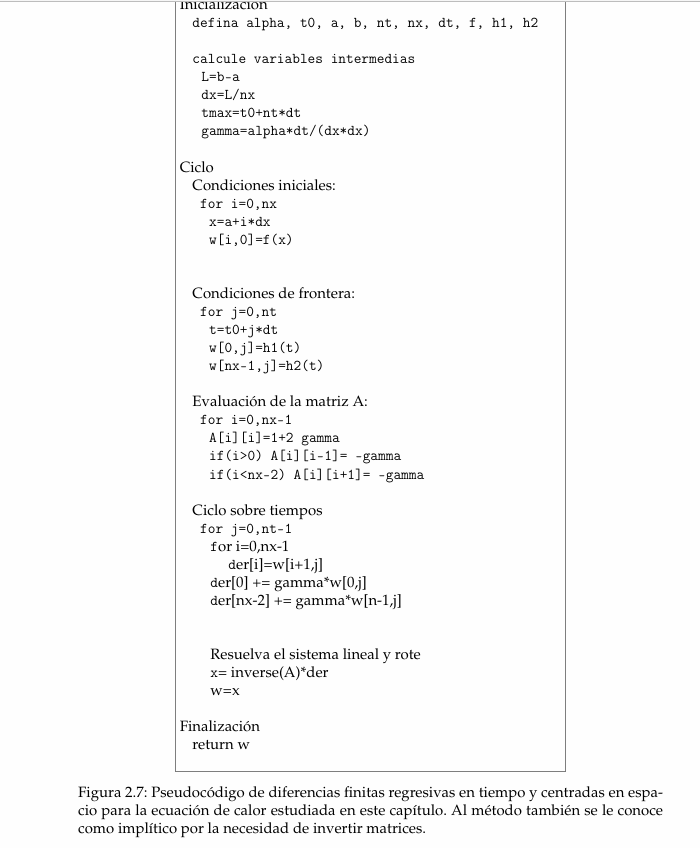

Estabilidad:

Como $| 1 + 2 \gamma | > 2 | \gamma |$
observando la matriz del sistema vemos que es *diagonalmente dominante** por filas. Por lo tanto el sistema es estable. Converge.

**Ojoooo**: Tarea mostrar que el sistema es estable usando el metodo de Von Neumann.

Vamos al codigo en `Python`.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

def solu_eq_implicit(alpha, t0, a, b, nt, nx, dt, f):
    # alpha constante de calor
    # ...etc

    L = b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)

    # imprimamos gamma
    print("gamma = ", gamma)

    tmax = nt*dt
    t = np.arange(t0, tmax, dt)

    # inicilizacion del vector w
    w = np.zeros((nx,nt))
    X = np.linspace(a,b, w.shape[0])

    print("dimensiones de w", w.shape)

    # condiciones de frontera (Dichlet homog'eneas)
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0

    # vector de la derecha
    rhs = np.zeros(nx-1)

    # condiciones iniciales
    for i in range(nx):
        w[i,0] = f(X[i])

    # inicializacion de matriz A
    A = np.zeros((nx-1,nx-1))

    # lleno de la matriz Z
    for i in range(nx-1):
        A[i,i] = 1 + 2*gamma # diagonal
        if i>0 : A[i][i-1] = -gamma # subdiagonal
        if i<nx-2: A[i][i+1] = -gamma # subdiagonal

    print("matriz A")
    print(A)

    # ciclo sobre tiempos
    for j in range(0, nt-1):
        # vector del lado derecho
        for i in range(nx-1):
            rhs[i] = w[i+1,j]

        rhs[0] += gamma*w[0,j]
        rhs[nx-2] += gamma*w[nx-1,j]

        # resolvemos el sistema matricial Ax=b
        x = linalg.solve(A, rhs)

        # rotacion
        for i in range(nx-2):
            w[i+1,j+1] = x[i]

    return w



# From ChatGPt
Gracias por pegar el código! Tu asimetría viene de un off-by-one: estás armando el sistema con
𝑛
𝑥
−
1
nx−1 incógnitas cuando las incógnitas interiores son
𝑛
𝑥
−
2
nx−2. Luego resuelves para un vector
𝑥
x de tamaño
𝑛
𝑥
−
1
nx−1 pero solo escribes de vuelta sus primeros
𝑛
𝑥
−
2
nx−2 elementos, descartando el último. Ese desajuste sesga la solución hacia un lado ⇒ error no simétrico.

Puntos concretos a corregir:

Las incógnitas son los nodos interiores
𝑖
=
1
,
…
,
𝑛
𝑥
−
2
i=1,…,nx−2.
Define n = nx-2.
Entonces A debe ser de tamaño (n, n) y rhs de tamaño (n,).

El “lado derecho” en BTCS con Dirichlet homogéneas es simplemente w[1:-1, j] (no hay términos extra porque las fronteras son 0).

Al escribir el resultado, asigna todos los interiores: w[1:-1, j+1] = x.


In [18]:
import numpy as np
from numpy import linalg

def solu_eq_implicit(alpha, t0, a, b, nt, nx, dt, f):
    L = b - a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    print("gamma = ", gamma)

    # malla
    w = np.zeros((nx, nt))
    X = np.linspace(a, b, nx)

    # Dirichlet homogéneas
    w[0, :] = 0.0
    w[-1, :] = 0.0

    # condición inicial
    w[:, 0] = f(X)

    # número de incógnitas interiores
    n = nx - 2

    # matriz tridiagonal de BTCS: (-gamma, 1+2gamma, -gamma)
    A = np.zeros((n, n))
    A[np.arange(n), np.arange(n)] = 1 + 2*gamma
    A[np.arange(1, n), np.arange(0, n-1)] = -gamma
    A[np.arange(0, n-1), np.arange(1, n)] = -gamma

    # bucle temporal
    for j in range(nt-1):
        # lado derecho: valores interiores del tiempo j
        rhs = w[1:-1, j].copy()  # tamaño n

        # si las fronteras fueran NO homogéneas:
        # rhs[0]     += gamma * w[0,   j+1]   # g_a^{j+1}
        # rhs[-1]    += gamma * w[-1,  j+1]   # g_b^{j+1}

        # resolver
        x = linalg.solve(A, rhs)

        # escribir completamente los interiores
        w[1:-1, j+1] = x

    return w


In [19]:
# prueba del algoritmo
alpha=1
a=0
b=1
nt=40001
nx=101
dt=0.00001
t0=0
L=b-a

# definicion de la condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)

w =  solu_eq_implicit(alpha, t0, a, b, nt, nx, dt, f)

gamma =  0.1


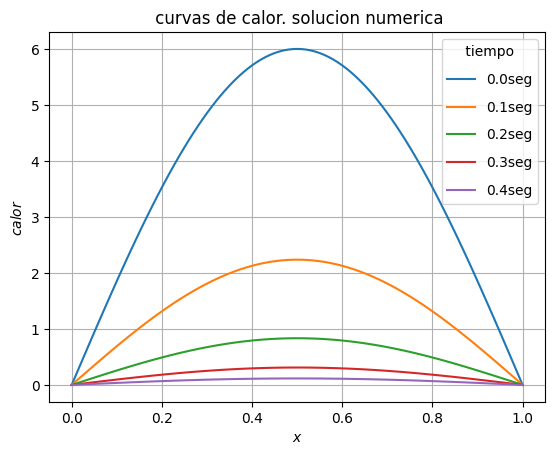

In [20]:
# graficamos la solucion
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"$calor$")

# title
plt.title(r" curvas de calor. solucion numerica")

# domain
X = np.linspace(a,b, nx)
for j in range(0, nt, 10000):
    t = j*dt
    plt.plot(X, w[:, j], label=str(round(t,1))+ 'seg')
    plt.legend(labelspacing=1, title=" tiempo ")
plt.grid()
plt.show()


# error con respecto a la solucion analitica
$$u(x,t)= 6 \sin \left ( \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac{1}{\alpha} \left ( \frac{\pi}{L} \right )^2 t  }  $$


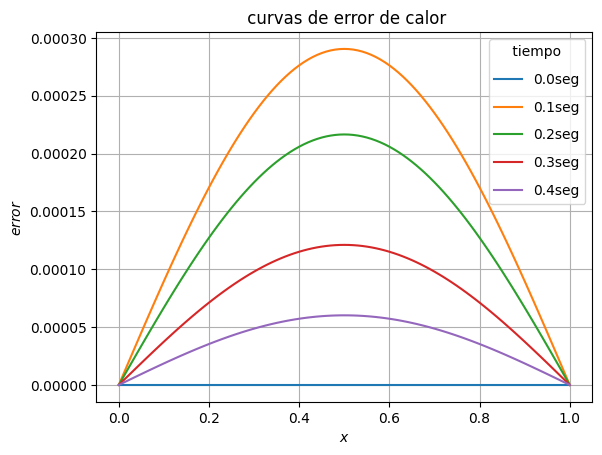

In [21]:
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp( -(1.0/alpha)* ( (np.pi/L)**2 * t ) )

nt=40001
dt=0.00001
Nt = int(nt/10000)+1
dx = (b-a)/(nx-1)

error = np.zeros((nx, Nt))

k=0
for j in range(0, nt, 10000):
    t = j*dt
    for i in range(nx):
        x = i*dx
        error[i,k] = w[i,j] - u(x,t)
    k += 1


# graficamos el error
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"$error$")

# title
plt.title(r" curvas de error de calor")

# domain
Dt=0.1
X = np.linspace(a,b, nx)
for j in range(Nt):
    t = j*Dt
    plt.plot(X, error[:, j], label=str(round(t,1))+ 'seg')
    plt.legend(labelspacing=1, title=" tiempo ")
plt.grid()
plt.show()


gamma =  1000.0


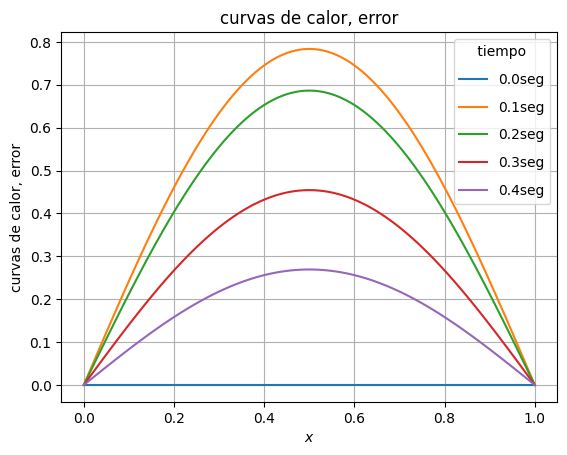

In [23]:
# aunque el metodo implicito es incondicionalmente estable no garantiza precision
nt=5
dt=0.1
dx=(b-a)/(nx-1)
w = solu_eq_implicit(alpha, t0, a, b, nt, nx, dt, f)

error = np.zeros((nx,nt))
k=0
for j in range(nt):
    t = j*dt
    for i in range(nx):
        x=i*dx
        error[i,k]=w[i,j]- u(x,t)
    k +=1

# graficmoas el error
params={'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r"$x$")
plt.ylabel(r"curvas de calor, error")
plt.title(r"curvas de calor, error")

X = np.linspace(0, L, w.shape[0])
for j in range(nt):
    t = j*dt
    plt.plot(X, error[:,j], label=str(round(t,1))+ 'seg')
    plt.legend(labelspacing=1, title=" tiempo ")
plt.grid()
plt.show()


# Metodo de Crank-Nicholson
El metodo anterior es de orden $\mathcal{O}(\Delta t)$ y
$\mathcal{O}(\Delta x^2)$. John Crank y Phyllips Nicholson inventaron un m'etodo que es preciso de orden 2 en ambas variables. Es decir
 $\mathcal{O}(\Delta t^2)$ y $\mathcal{O}(\Delta x^2)$.

Veamos que fue lo que hicieron.

Comenzamos con la discretizacion de la ecuacion explicita FTCS

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = \alpha \frac{ w_{i+1 j} - 2 w_{ij} +
 w_{i-1 j}}{\Delta x^2} + \mathcal{O}(\Delta x^2) - \frac12 \frac{\partial^2 u}{\partial t^2}(c_1) \Delta t \tag{1} $$
 usando Taylor $c_1 \in [t_j, t_{j+1}]$

 El error es

$$  \epsilon_{ftcs} = - \frac12 \frac{\partial^2 u}{\partial t^2}(c_1) \Delta t$$

La discretizaci'on regresiva en tiempo y centrada en espacio (BTCS) se puede escribir como

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = \alpha \frac{ w_{i+1 j+1} - 2 w_{i \; j+1} +  w_{i-1 j+1}}{\Delta x^2} + \mathcal{O}(\Delta x^2) + \frac12 \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t \tag{2} $$
 usando Taylor $c_1 \in [t_j, t_{j+1}]$

 donde

$$  \epsilon_{btcs} = - \frac12 \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t$$
con $c_2 \in [t_j, t_{j+1}]$.

Las ecuaciones (1) y (2) se pueden escribir (ignoremos el error y la segundas derivadas)

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = S
\left ( \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
    \right )  +  (1 - S) \left(
        \alpha  \frac{w_{i+1 j+1} - 2 w_{i j+1} + w_{i-1 j+1}}{\Delta x^2}
    \right ) $$

* Si $S=1$ estamos en FCTS
* Si $S=0$ estamos en BCTS

Crank-Nicholson econtraron que $S=1/2$ nos produce " el mejor de los dos mundos" y como vamos a ver con un error mas pequenho, ademas de ser incondicionamente estable.

* Si $S=1/2$
y tendiendo en cuenta las segundas derivadas (vienen de Taylor)

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} =
\left ( \alpha \frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{2 \Delta x^2}
    \right )  +   \left(
        \alpha  \frac{w_{i+1 j+1} - 2 w_{i j+1} + w_{i-1 j+1}}{2 \Delta x^2}
    \right ) +
    \frac14 \frac{\partial^2 u}{\partial t^2}(c_1) \Delta t
    - \frac14 \frac{\partial^2 u}{\partial t^2}(c_2) \Delta t
    $$

Veamos el error. Del TVM para derivadas (teorema del valor medio)

$$   \frac{\partial^2 u}{\partial t^2}(c_1)
    - \frac{\partial^2 u}{\partial t^2}(c_2) =  \frac{\partial^3 u}{\partial t^3}(c) \Delta t$$


donde $c \in [c_1, c_2]$, asumiendo $c_1 < c_2$ o
donde $c \in [c_2, c_1]$, asumiendo $c_2 < c_2$ o

y como $(\Delta t)( \Delta t) = \Delta t^2$
entonces el error es del orden de $\Delta t^2$ y es m'as preciso que el FCTS y el BCTS.

Entonces tenemos que

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} =
\alpha \frac{w_{i+1 j}-2 w_{ij} + w_{i-1 j}}{2 \Delta x^2 } +
\alpha \frac{w_{i+1 j+1}-2 w_{ij+1} + w_{i-1 j+1}}{2 \Delta x^2 } $$
mas error del orden $\mathcal{O}(\Delta t^2)$ y $\mathcal{O}(\Delta x^2)$.

Toca despejar los terminos con $j+1$ como funciones de los terminos $j$.
A la izquierda los $j+1$ a la derecha los $j$.

Definamos
$$\beta = \frac{\alpha \Delta t}{(2 \Delta x)^2} $$
Queda

$$-\beta w_{i-1 j+1} + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 \; j}  + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} $$

La estrella para este sistema se muestra en la Figura 2.8

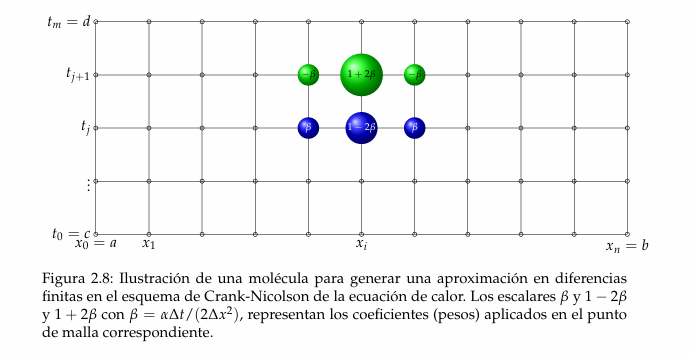

Para buscar la forma matricial de este sistema veamoso


$$-\beta w_{i-1 j+1} + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 \; j}  + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} \tag{3} $$

* $i=1$.
$$-\beta w_{0 j+1} + (1 + 2 \beta) w_{1 j+1} - \beta w_{2 j+1} = \beta w_{0 \; j}  + (1 - 2 \beta) w_{1j} + \beta w_{2 j} $$

movemos el primer termino a la derecha

$$ (1 + 2 \beta) w_{1 j+1} - \beta w_{2 j+1} = \beta w_{0 \; j}  + (1 - 2 \beta) w_{1j} + \beta w_{2 j}  + \beta w_{0 j+1} $$

* $i=2$
$$-\beta w_{1 j+1} + (1 + 2 \beta) w_{2 j+1} - \beta w_{3 j+1} = \beta w_{1 \; j}  + (1 - 2 \beta) w_{2j} + \beta w_{3 j} $$

* $i=n-2$:
$$-\beta w_{n-3 j+1} + (1 + 2 \beta) w_{n-2 j+1} - \beta w_{n-1 j+1} = \beta w_{n-3 \; j}  + (1 - 2 \beta) w_{n-2j} + \beta w_{n-1 j} $$

* $i=n-1$:

$$-\beta w_{n-2 j+1} + (1 + 2 \beta) w_{n-1 j+1} - \beta w_{n j+1} = \beta w_{n-2 \; j}  + (1 - 2 \beta) w_{n-1 j} + \beta w_{n j} $$

Movemos a la dereecha el termino en $w_{n j+1}$
$$-\beta w_{n-2 j+1} + (1 + 2 \beta) w_{n-1 j+1}  = \beta w_{n-2 \; j}  + (1 - 2 \beta) w_{n-1 j} + \beta w_{n j}  + \beta w_{n j+1} $$

El sistema queda como

</small>
<span style="font-size: 85%;">
$$
\begin{pmatrix}
1 + 2 \beta & \beta & 0 & \cdots & \cdots & 0 \\
\beta & 1 + 2 \beta &  \beta & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots 0 \\
\vdots & \ddots & \ddots &  \beta & 1 + 2 \beta &  \beta \\
0 & \cdots & \cdots & 0 & \beta & 1 + 2 \beta
\end{pmatrix}
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
w_{n-2 j+1} \\
w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 - 2 \beta & -\beta & 0 & \cdots & \cdots & 0 \\
-\beta & 1 - 2 \beta & - \beta & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots 0 \\
\vdots & \ddots & \ddots & - \beta & 1 - 2 \beta & - \beta \\
0 & \cdots & \cdots & 0 & -\beta & 1 - 2 \beta
\end{pmatrix}
\begin{pmatrix}
w_{1 j} \\
w_{2 j} \\
\vdots \\
w_{n-2 j} \\
w_{n-1 j}
\end{pmatrix}
+ \beta
\begin{pmatrix}
w_{0j} + w_{0 j+1} \\
0 \\
\vdots  \\
0 \\
w_{nj} + w_{n j+1}
\end{pmatrix}
$$
</small>
<span style="font-size: 85%;">

Hacemos el analisis de estabilidad y el codigo en `Python` en la proxima clase.o
Usamos Von Neumann

$$w_{ij} = \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} $$


El factor de Ganancia es

$$ G = \frac{w_{i j+1}}{w_{ij}} = \mathrm{e}^{\alpha \Delta t}$$

De forma que reemplazando en la Ecuacion (3)
$$-\beta \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_{i-1}} + (1 + 2 \beta) \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i} -
\beta \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_{i+1}} =
\beta \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i-1}}  +
(1 - 2 \beta) \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} +
\beta \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i+1}}  $$

Dividmos todo por $w_{ij} = \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}$

$$\beta G \mathrm{e}^{-\mathrm{i} k \Delta x} + (1 + 2 \beta) G - \beta G \mathrm{e}^{\mathrm{i} k \Delta x} = \beta \mathrm{e}^{-\mathrm{i} k \Delta x} + (1 - 2 \beta)  + \beta \mathrm{e}^{\mathrm{i} k \Delta x} $$

Depejamos $G$

$$G = \frac{1 - 2 \beta + 2 \beta \cos k \Delta x}{1 + 2 \beta - 2 \beta cos k \Delta x} = \frac{1 - 4 \beta \sin^2 \frac{k \Delta x}{2}}{1  + 4 \beta \sin^2 \frac{k \Delta x}{2} }  \le 1 $$
